<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/yeonjeong/%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%A0%95%EB%A6%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import argparse
import imutils
from google.colab.patches import cv2_imshow
from ctypes import resize
from PIL import Image

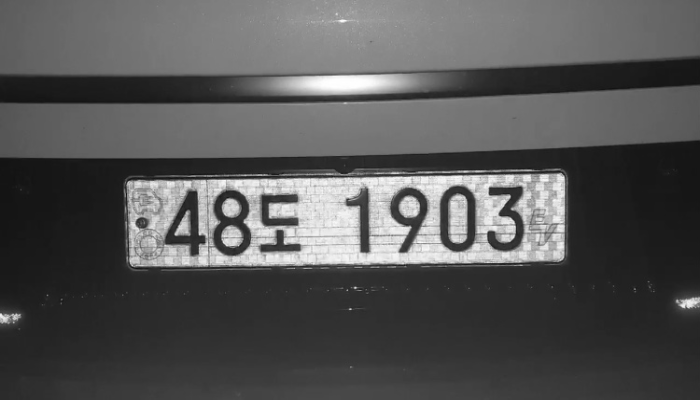

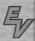

In [53]:
template = cv2.imread('/content/drive/MyDrive/testvideo.PNG')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template, (700,400))

cv2_imshow(template)

ev = cv2.imread('/content/drive/MyDrive/ev.png')
ev = cv2.cvtColor(ev, cv2.COLOR_BGR2GRAY)
ev = cv2.resize(ev,(35,41))

car = cv2.imread('/content/drive/MyDrive/car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
car = cv2.resize(car,(37, 30))

cv2_imshow(ev)
cv2_imshow(car)

# **템플릿 이미지 크롭**

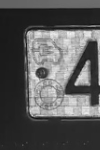

In [54]:
# 자동차 마크 크롭

car_img = template.copy()

car_img = template[150:300, 100:200]

cv2_imshow(car_img)

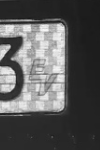

In [55]:
# EV 마크 크롭

ev_img = template.copy()
ev_img = template[150:300,500:600]


cv2_imshow(ev_img)

# **이미지 전처리**
---
1. Canny
2. Laplacian
3. Sobel

In [56]:
"""
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
ev_img = cv2.filter2D(ev_img,-1,kernel_sharpening)

ev_img = cv2.Canny(ev_img,80,200)

cv2_imshow(ev_img)
"""

'\nkernel_sharpening = np.array([[-1,-1,-1],\n                              [-1,9,-1],\n                              [-1,-1,-1]])\nev_img = cv2.filter2D(ev_img,-1,kernel_sharpening)\n\nev_img = cv2.Canny(ev_img,80,200)\n\ncv2_imshow(ev_img)\n'

# **templateMatch - 단순 매칭**

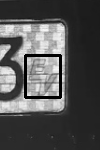

In [57]:
result = cv2.matchTemplate(ev_img,ev,cv2.TM_CCOEFF_NORMED)

min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)

startX, startY = max_loc

endX, endY = startX+35, startY+42

cv2.rectangle(ev_img,(startX,startY),(endX,endY),(0,0,255),2)

cv2_imshow(ev_img)

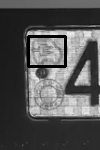

In [60]:
result = cv2.matchTemplate(car_img,car,cv2.TM_CCOEFF_NORMED)

min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)

startX,startY = max_loc

endX, endY = startX + 37, startY + 30
cv2.rectangle(car_img,(startX,startY),(endX,endY),(0,0,255),2)

cv2_imshow(car_img)

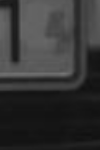

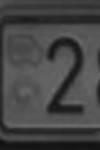

In [103]:
template = cv2.imread('/content/drive/MyDrive/화면 캡처 2022-09-17 191929.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template,(700,400))

ev_img = template.copy()
car_img = template.copy()

car_img = template[100:250, 100:200]
ev_img = template[150:300, 500:600]

cv2_imshow(ev_img)
cv2_imshow(car_img)

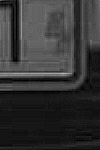

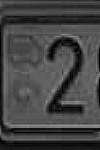

In [104]:
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
ev_img = cv2.filter2D(ev_img,-1,kernel_sharpening)
car_img = cv2.filter2D(car_img,-1,kernel_sharpening)
cv2_imshow(ev_img)
cv2_imshow(car_img)

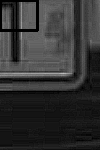

In [105]:
result = cv2.matchTemplate(ev_img,ev,cv2.TM_CCOEFF_NORMED)

min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)

startX,startY = max_loc

endX, endY = startX + 37, startY + 30
cv2.rectangle(ev_img,(startX,startY),(endX,endY),(0,0,255),2)

cv2_imshow(ev_img)

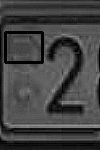

In [106]:
result = cv2.matchTemplate(car_img,car,cv2.TM_CCOEFF_NORMED)

min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)

startX,startY = max_loc

endX, endY = startX + 37, startY + 30
cv2.rectangle(car_img,(startX,startY),(endX,endY),(0,0,255),2)

cv2_imshow(car_img)

# **matchTemplate scale 변화**

In [61]:
template = cv2.imread('/content/drive/MyDrive/testvideo.PNG')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template, (700,400))

ev = cv2.imread('/content/drive/MyDrive/ev.png')
ev = cv2.cvtColor(ev, cv2.COLOR_BGR2GRAY)
ev = cv2.resize(ev,(35,42))

car = cv2.imread('/content/drive/MyDrive/car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
car = cv2.resize(car,(37, 30))



car_img = template.copy()

car_img = template[150:300, 100:200]

ev_img = template.copy()
ev_img = template[150:300,500:600]


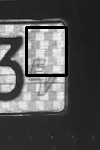

In [16]:

(tH, tW) =  ev.shape[:2]

found = None

for scale in np.linspace(0.2,1.0,20)[::-1]:
    resized = imutils.resize(ev_img,width = int(ev_img.shape[1]*scale))
    r = ev_img.shape[1] / float(resized.shape[1])

    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    edged = cv2.Canny(resized, 50, 200)

    result = cv2.matchTemplate(edged, ev,cv2.TM_CCOEFF)
    (_, maxVal,_,maxLoc) = cv2.minMaxLoc(result)

    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

(_, maxLoc,r) = found
(startX, startY) = (int(maxLoc[0] * r),int(maxLoc[1]*r))
(endX,endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

cv2.rectangle(ev_img, (startX,startY),(endX,endY),(0,0,255),2)
cv2_imshow(ev_img)

# **BFMatcher**
---
- BFMatcher queryDescriptors와 trainDescriptors 하나하나 확인해 매칭되는지 판단

In [111]:
template = cv2.imread('/content/drive/MyDrive/testvideo.PNG')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template, (700,400))

ev = cv2.imread('/content/drive/MyDrive/ev.png')
ev = cv2.cvtColor(ev, cv2.COLOR_BGR2GRAY)
ev = cv2.resize(ev,(100,150))

car = cv2.imread('/content/drive/MyDrive/car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
car = cv2.resize(car,(100, 150))



car_img = template.copy()

car_img = template[150:300, 100:200]

ev_img = template.copy()
ev_img = template[150:300,500:600]


ev size가 35x41 인경우 dessc2에 값이 제대로 들어가지 않는다.


In [69]:
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(ev_img,None)
kp2, desc2 = detector.detectAndCompute(ev,None)

print(desc1)
print(desc2)

[[214  86 133 ... 117 137  21]
 [212 223 158 ... 114 165  43]
 [151 223 140 ... 127 185 144]
 ...
 [214 205 167 ... 125 245 238]
 [128  28 158 ... 120 181 218]
 [214 148 188 ... 115 173  55]]
[[219  84 109 ... 183  80 125]
 [ 24 201  67 ... 143 112  40]
 [188 225   3 ...   8 240 162]
 ...
 [ 90  89  62 ...  28  45  27]
 [ 11 245  30 ...  86 171  30]
 [110 234 237 ... 249 212 114]]


In [70]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

matches : 4 / 22, min : 71.00, max : 95.00, thresh : 75.80


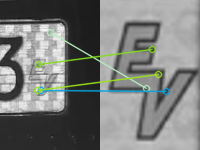

In [71]:
matches = sorted(matches,key=lambda x:x.distance)
min_dist, max_dist = matches[0].distance,matches[-1].distance

ratio=0.2

good_thresh = (max_dist-min_dist) * ratio + min_dist

good_matches = [m for m in matches if m.distance < good_thresh]
print('matches : %d / %d, min : %.2f, max : %.2f, thresh : %.2f' %(len(good_matches),len(matches),min_dist,max_dist,good_thresh))

res = cv2.drawMatches(ev_img,kp1,ev,kp2,good_matches,None,flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)

In [113]:
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(car_img,None)
kp2, desc2 = detector.detectAndCompute(car,None)

#print(desc1)
#print(desc2)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

matches : 1 / 12, min : 54.00, max : 87.00, thresh : 60.60


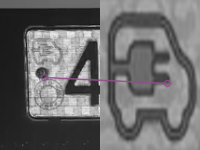

In [114]:
matches = sorted(matches,key=lambda x:x.distance)
min_dist, max_dist = matches[0].distance,matches[-1].distance

ratio=0.2

good_thresh = (max_dist-min_dist) * ratio + min_dist

good_matches = [m for m in matches if m.distance < good_thresh]
print('matches : %d / %d, min : %.2f, max : %.2f, thresh : %.2f' %(len(good_matches),len(matches),min_dist,max_dist,good_thresh))

res = cv2.drawMatches(car_img,kp1,car,kp2,good_matches,None,flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)

# **RANSAC**
---
원근 변환 근사 계산 -> 나쁜 매칭 제거

- ev 이미지 사이즈를 실제 크기와 비슷한 경우 제대로 키포인트를 찾아내지 못함.

In [123]:
template = cv2.imread('/content/drive/MyDrive/testvideo.PNG')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.resize(template, (700,400))

ev = cv2.imread('/content/drive/MyDrive/ev.png')
ev = cv2.cvtColor(ev, cv2.COLOR_BGR2GRAY)
ev = cv2.resize(ev,(100,150))

car = cv2.imread('/content/drive/MyDrive/car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
car = cv2.resize(car,(100, 150))



car_img = template.copy()

car_img = template[150:300, 100:200]

ev_img = template.copy()
ev_img = template[150:300,500:600]


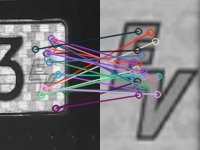

In [124]:
detector = cv2.ORB_create()
kp1,desc1 = detector.detectAndCompute(ev,None)
kp2, desc2 = detector.detectAndCompute(ev_img,None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)
matches = matcher.match(desc1,desc2)

matches = sorted(matches, key = lambda x:x.distance)

res1 = cv2.drawMatches(ev_img,kp1,ev,kp2,matches,None,flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(res1)

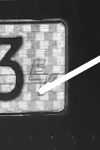

In [125]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches])
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches])

mtrx,mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
h,w = ev.shape[:2]
pts = np.float32([[[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]]])

dst = cv2.perspectiveTransform(pts,mtrx)

ev_img = cv2.polylines(ev_img,[np.int32(dst)],True,(255,0,0),3,cv2.LINE_AA)
cv2_imshow(ev_img)

accuracy : 8 / 22 (0.36%)


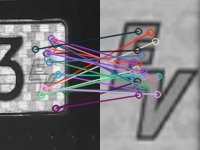

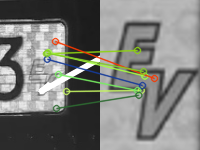

In [126]:
matchesMask = mask.ravel().tolist()

res2 = cv2.drawMatches(ev_img,kp1,ev,kp2,matches,None,matchesMask = matchesMask,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
accuracy = float(mask.sum()) / mask.size

print("accuracy : %d / %d (%.2f%%)" % (mask.sum(),mask.size,accuracy))

cv2_imshow(res1)
cv2_imshow(res2)